<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
!pip install micropip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.6 MB/s eta 0:00:00


In [2]:
import micropip
await micropip.install(['numpy'])
await micropip.install(['pandas'])
await micropip.install(['seaborn'])

In [3]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [9]:
# from js import fetch
# import io

# URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp = await fetch(URL)
# dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
# df=pd.read_csv(dataset_part_2_csv)
# df.head(5)


import requests

def download_file(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed to download from {url}, status code: {response.status_code}")

# Example usage
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
filename = "dataset_part_2.csv"  # Choose the desired file name

download_file(path, filename)

Downloaded dataset_part_2.csv


In [10]:
df=pd.read_csv(filename)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


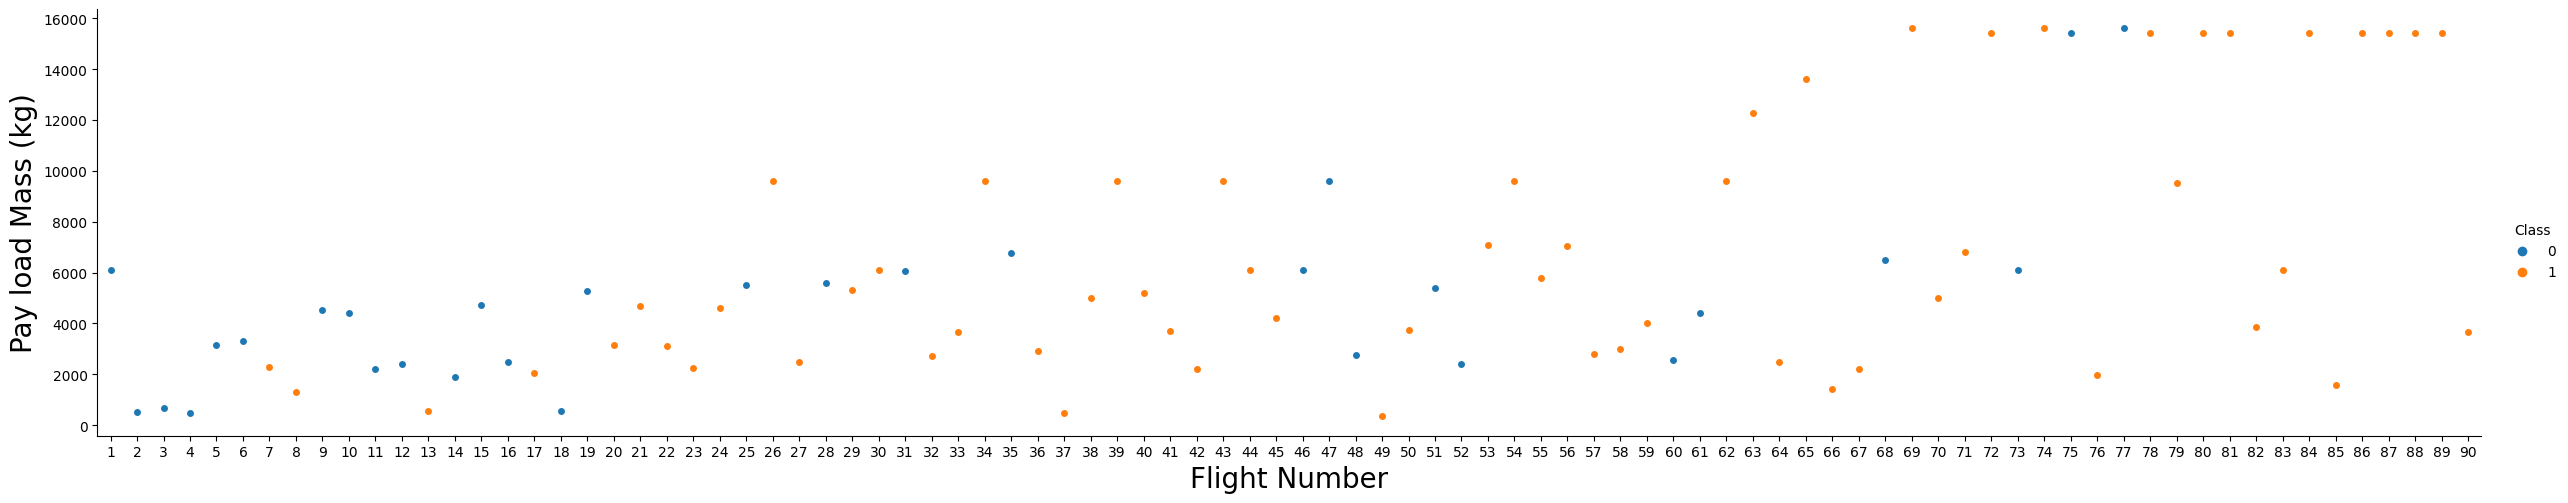

In [11]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


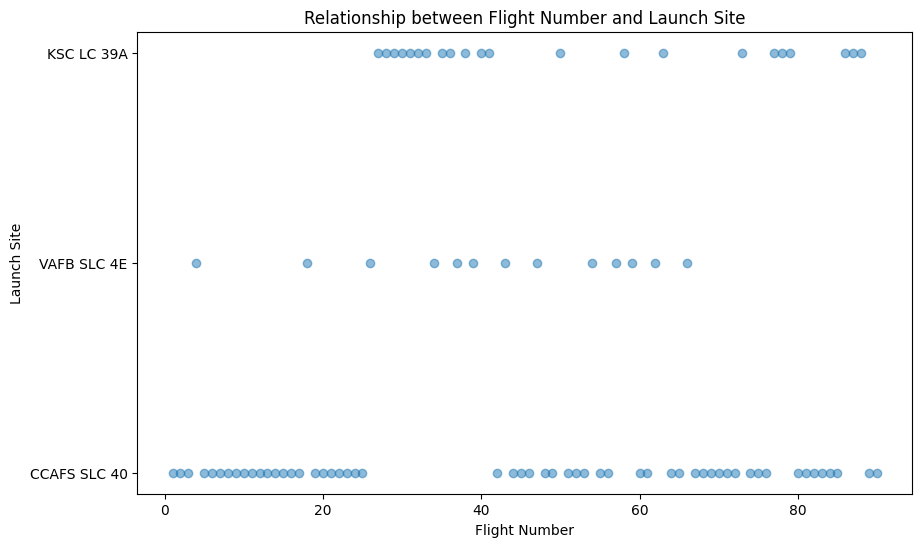

In [12]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
plt.figure(figsize=(10, 6))
plt.scatter(df['FlightNumber'], df['LaunchSite'], alpha=0.5)
plt.title('Relationship between Flight Number and Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


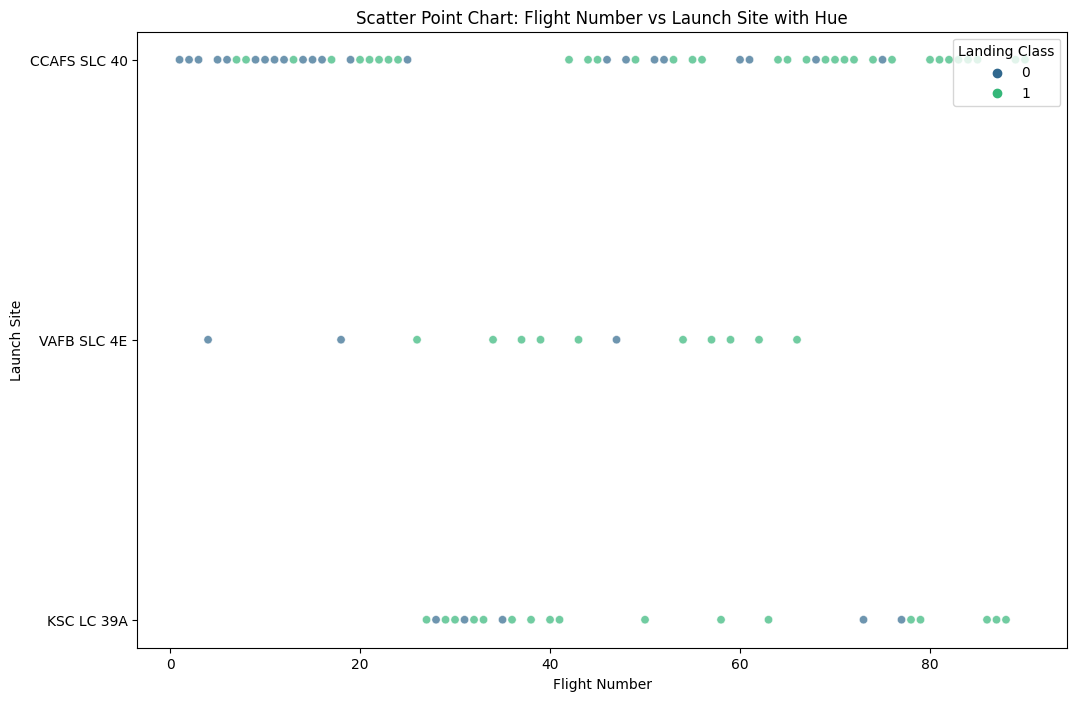

In [13]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', palette='viridis', alpha=0.7)
plt.title('Scatter Point Chart: Flight Number vs Launch Site with Hue')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.legend(title='Landing Class', loc='upper right')
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


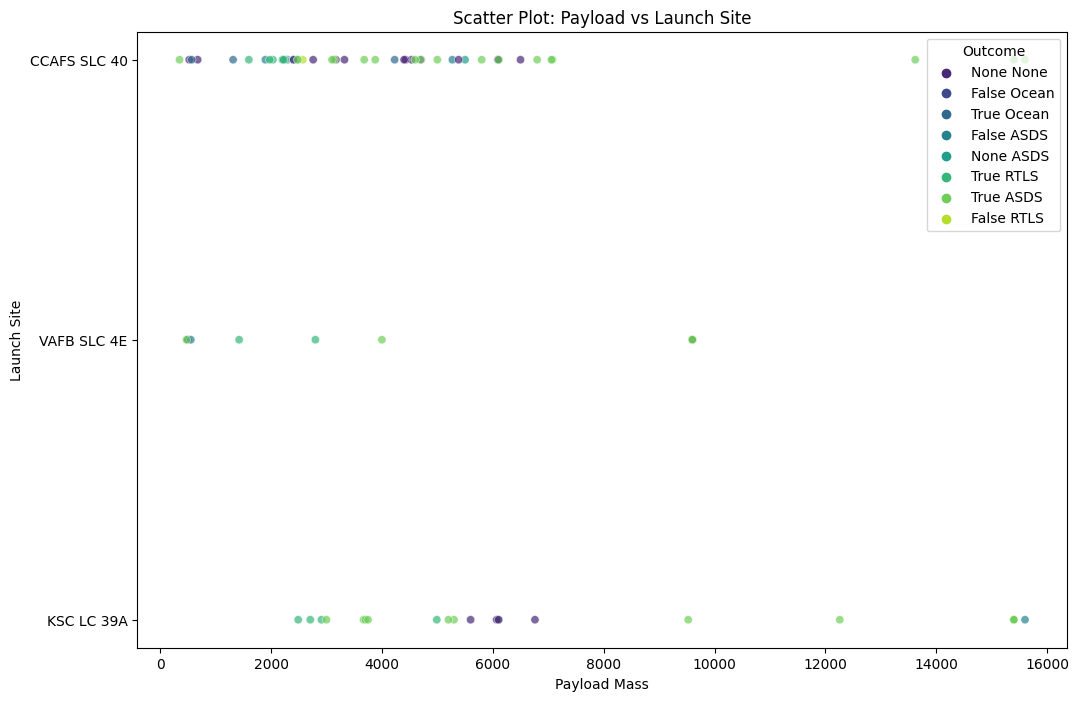

In [16]:
### TASK 2: Visualize the relationship between Payload and Launch Site
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Outcome', palette='viridis', alpha=0.7)
plt.title('Scatter Plot: Payload vs Launch Site')
plt.xlabel('Payload Mass')
plt.ylabel('Launch Site')
plt.legend(title='Outcome', loc='upper right')
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


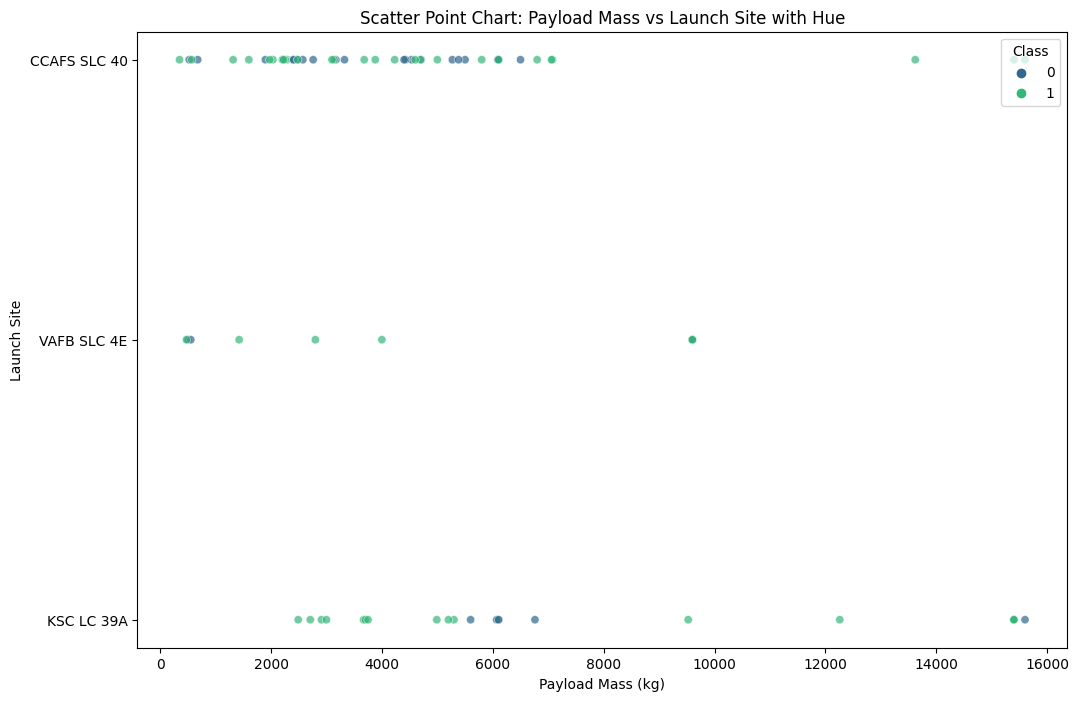

In [17]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', palette='viridis', alpha=0.7)
plt.title('Scatter Point Chart: Payload Mass vs Launch Site with Hue')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.legend(title='Class', loc='upper right')
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


In [19]:
# Calculate success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Outcome'].apply(lambda x: x.value_counts(normalize=True).get('Success', 0))

print(orbit_success_rate)

# Convert to DataFrame for easier plotting
orbit_success_rate = orbit_success_rate.reset_index(name='SuccessRate')

print(orbit_success_rate)


Orbit
ES-L1    0
GEO      0
GTO      0
HEO      0
ISS      0
LEO      0
MEO      0
PO       0
SO       0
SSO      0
VLEO     0
Name: Outcome, dtype: int64
    Orbit  SuccessRate
0   ES-L1            0
1     GEO            0
2     GTO            0
3     HEO            0
4     ISS            0
5     LEO            0
6     MEO            0
7      PO            0
8      SO            0
9     SSO            0
10   VLEO            0


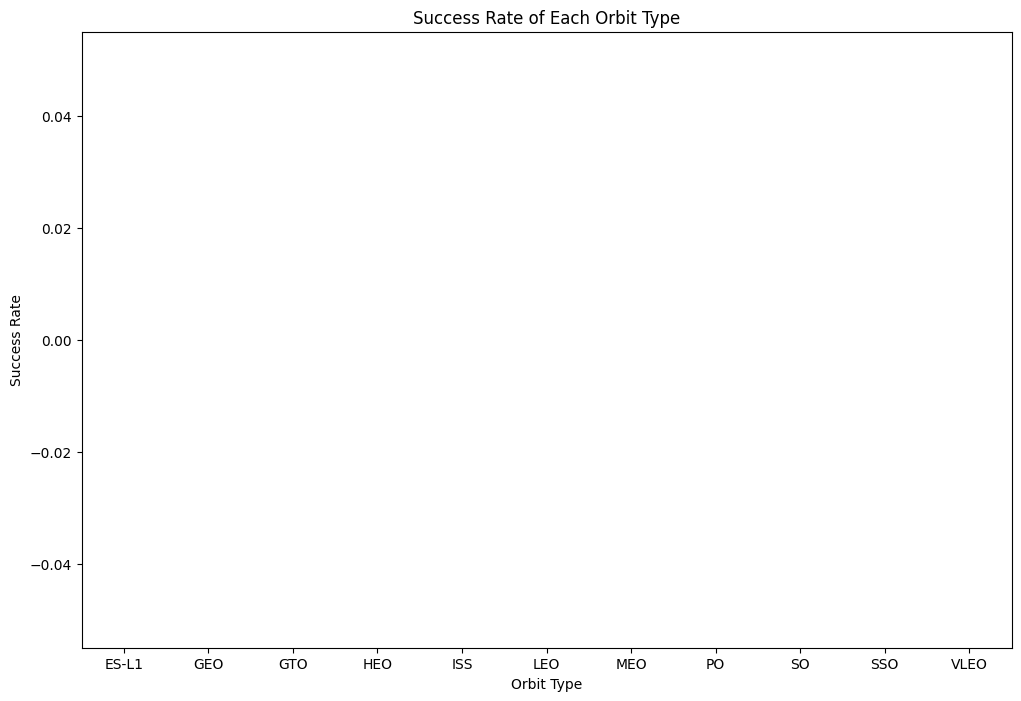

In [18]:
### TASK  3: Visualize the relationship between success rate of each orbit type
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the relevant data

# Calculate success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Outcome'].apply(lambda x: x.value_counts(normalize=True).get('Success', 0))

# Convert to DataFrame for easier plotting
orbit_success_rate = orbit_success_rate.reset_index(name='SuccessRate')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=orbit_success_rate, x='Orbit', y='SuccessRate', palette='Set2')
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


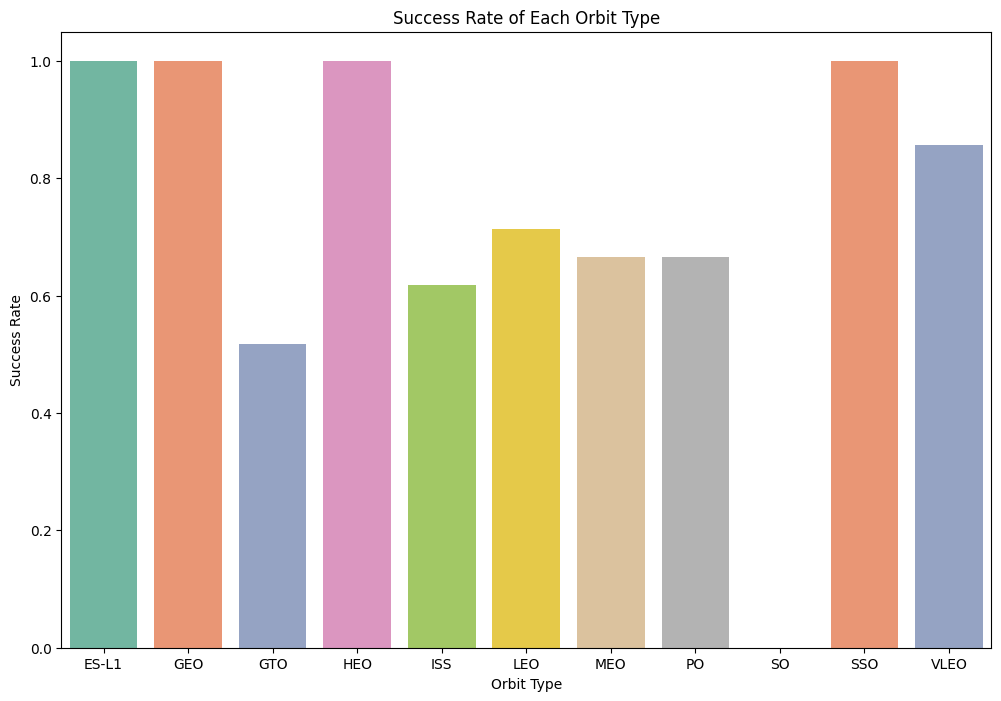

In [20]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index(name='SuccessRate')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=orbit_success_rate, x='Orbit', y='SuccessRate', palette='Set2')
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


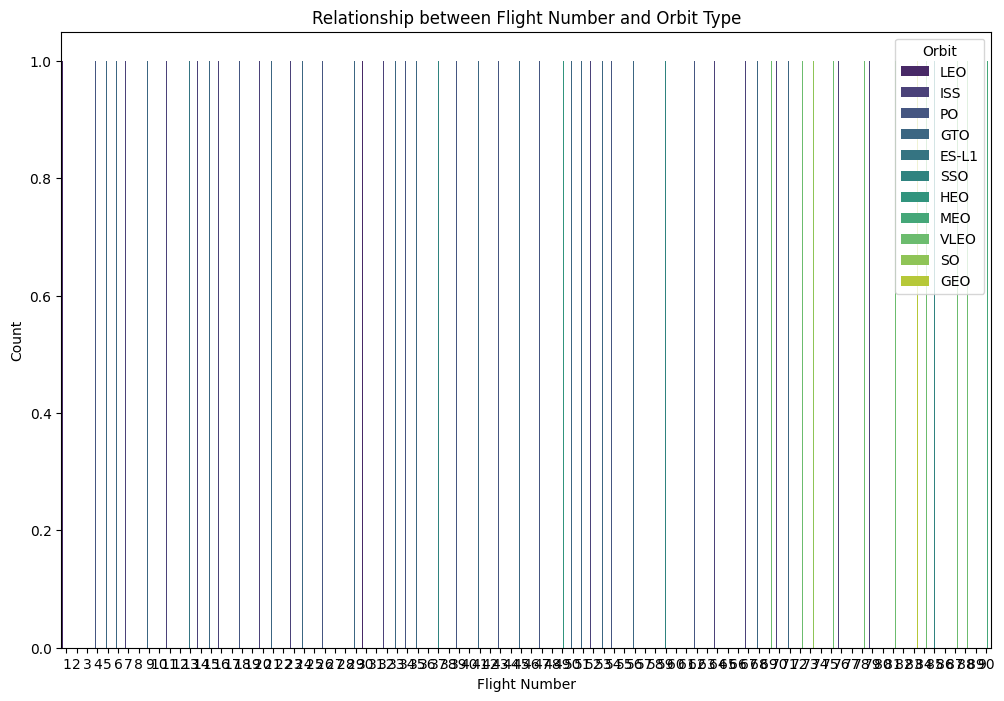

In [21]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='FlightNumber', hue='Orbit', palette='viridis')
plt.title('Relationship between Flight Number and Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Count')
plt.legend(title='Orbit', loc='upper right')
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


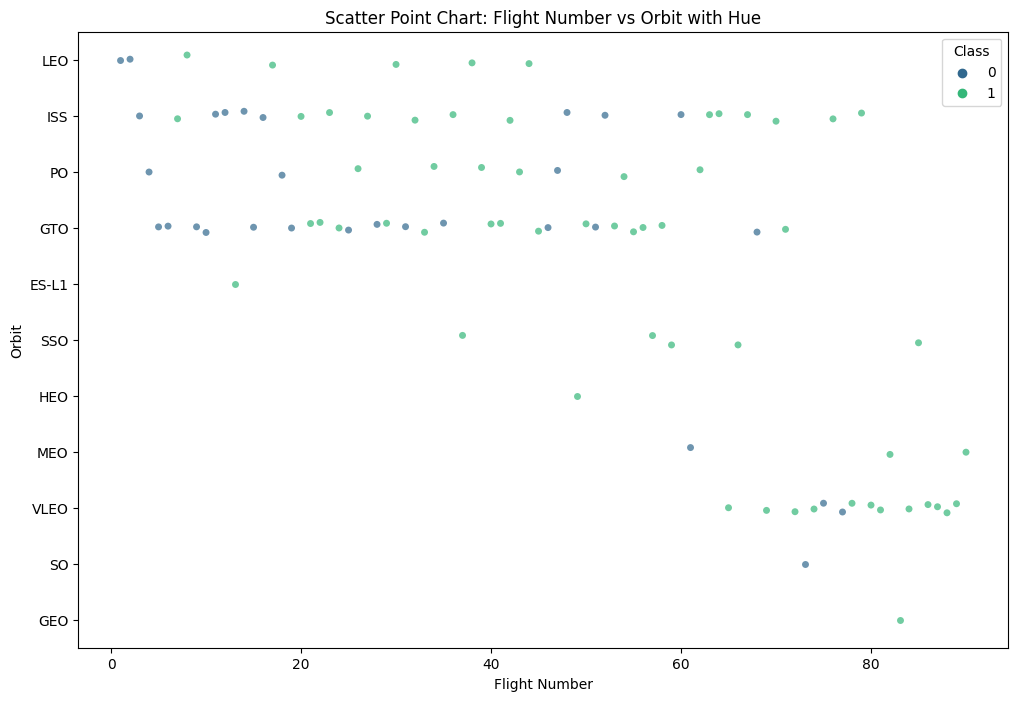

In [22]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='viridis', alpha=0.7)
plt.title('Scatter Point Chart: Flight Number vs Orbit with Hue')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.legend(title='Class', loc='upper right')
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


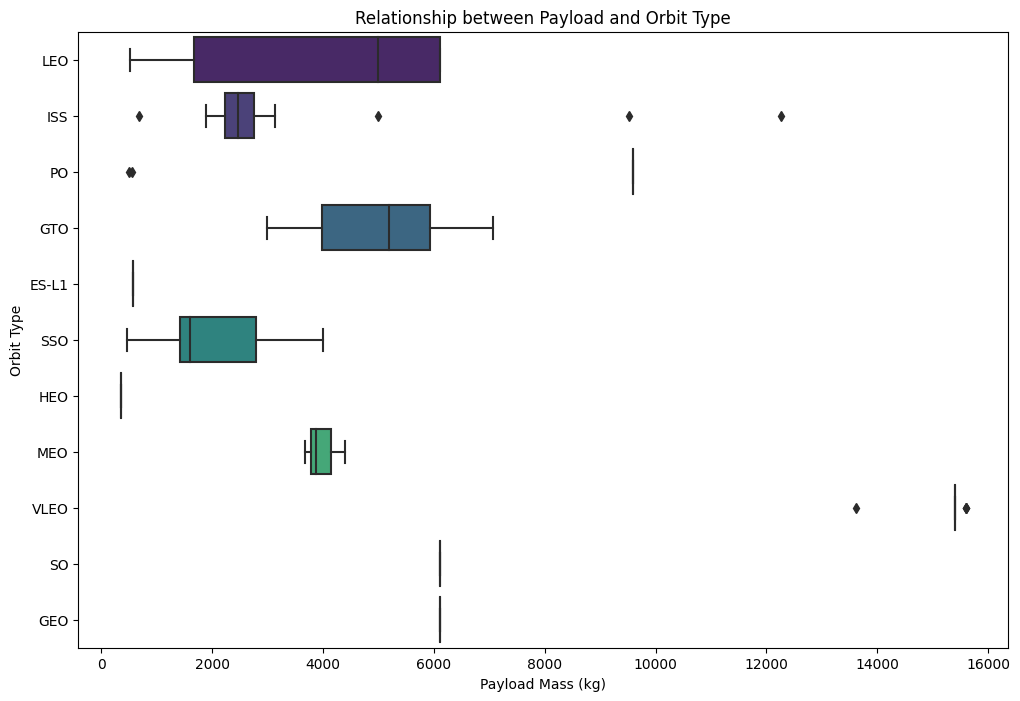

In [23]:
### TASK  5: Visualize the relationship between Payload and Orbit type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='PayloadMass', y='Orbit', palette='viridis')
plt.title('Relationship between Payload and Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


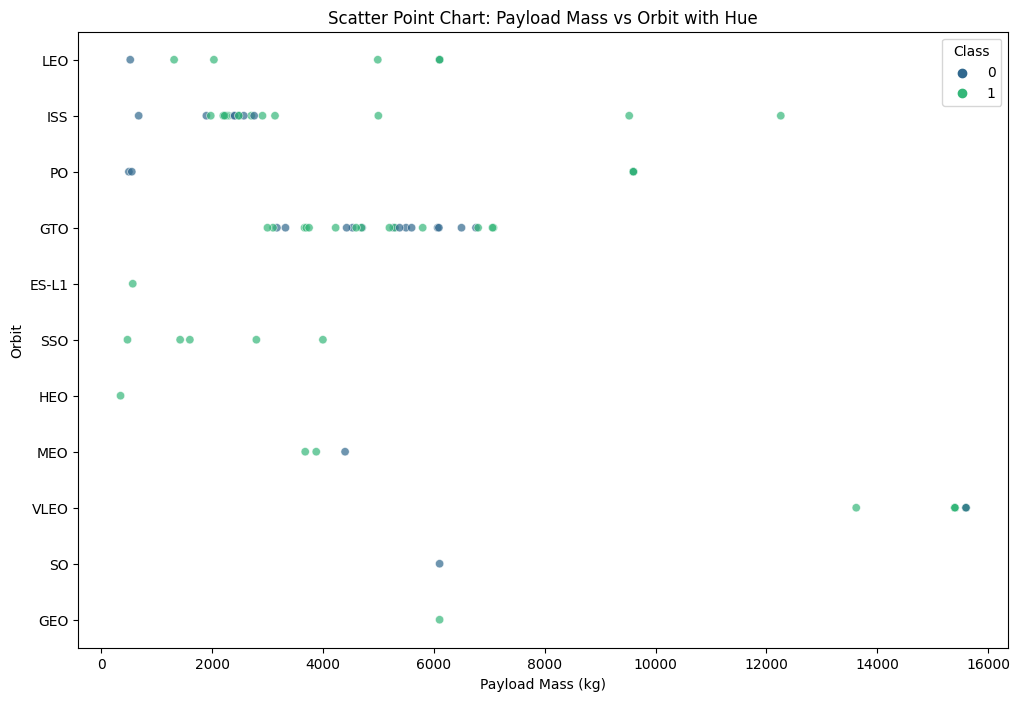

In [24]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='viridis', alpha=0.7)
plt.title('Scatter Point Chart: Payload Mass vs Orbit with Hue')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')
plt.legend(title='Class', loc='upper right')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [29]:
### TASK  6: Visualize the launch success yearly trend
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Check if there are successful launches in the DataFrame
if 'Success' in df['Outcome'].values:
    # Count the number of successful launches for each year
    success_counts = df[df['Outcome'] == 'Success'].groupby('Year').size().reset_index(name='SuccessCount')

    # Print intermediate results for debugging
    print("Success Counts:")
    print(success_counts)

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.barplot(data=success_counts, x='Year', y='SuccessCount', palette='Set2')
    plt.title('Launch Success Yearly Trend')
    plt.xlabel('Year')
    plt.ylabel('Number of Successful Launches')
    plt.show()
else:
    print("No successful launches in the dataset.")

No successful launches in the dataset.


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [31]:
def extract_year(date):
    return date.dt.year

df['Year'] = extract_year(df['Date'])
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


KeyError: ignored

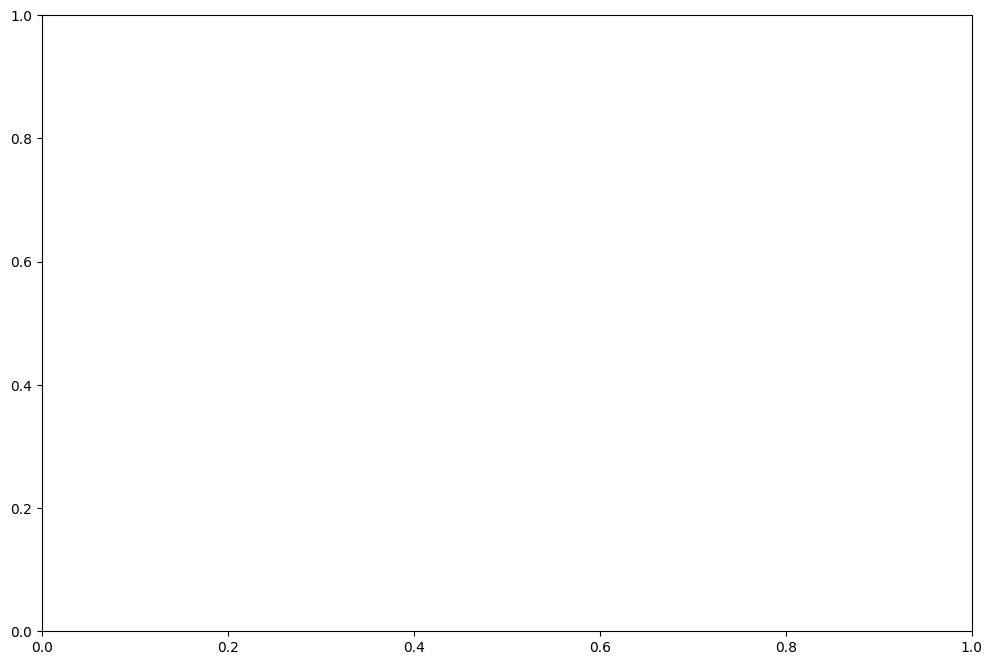

In [34]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Calculate success rate for each year
success_rate = df[df['Outcome'] == 'Success'].groupby('Year').size() / df.groupby('Year').size()
success_rate = success_rate.reset_index(name='SuccessRate')

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=success_rate, x='Year', y='SuccessRate', marker='o')
plt.title('Success Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [35]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [36]:
### TASK  7: Create dummy variables to categorical columns
# Select categorical columns to create dummy variables
categorical_columns = ['Orbit', 'LaunchSite', 'Outcome']  # Add other categorical columns as needed

# Create dummy variables for selected categorical columns
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)

# Display the updated DataFrame with dummy variables
print(df.head())

   FlightNumber       Date BoosterVersion  PayloadMass  Flights  GridFins  \
0             1 2010-06-04       Falcon 9  6104.959412        1     False   
1             2 2012-05-22       Falcon 9   525.000000        1     False   
2             3 2013-03-01       Falcon 9   677.000000        1     False   
3             4 2013-09-29       Falcon 9   500.000000        1     False   
4             5 2013-12-03       Falcon 9  3170.000000        1     False   

   Reused   Legs LandingPad  Block  ...  Orbit_VLEO LaunchSite_KSC LC 39A  \
0   False  False        NaN    1.0  ...           0                     0   
1   False  False        NaN    1.0  ...           0                     0   
2   False  False        NaN    1.0  ...           0                     0   
3   False  False        NaN    1.0  ...           0                     0   
4   False  False        NaN    1.0  ...           0                     0   

   LaunchSite_VAFB SLC 4E  Outcome_False Ocean  Outcome_False RTLS  \
0   

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns

In [39]:
### TASK  8: Cast all numeric columns to `float64`

# Identify numeric columns (excluding datetime columns)
numeric_columns = df.select_dtypes(include=['number']).columns

# Cast numeric columns to float64
df[numeric_columns] = df[numeric_columns].astype(float)

# Display the updated DataFrame
print(df.head())

   FlightNumber       Date BoosterVersion  PayloadMass  Flights  GridFins  \
0           1.0 2010-06-04       Falcon 9  6104.959412      1.0     False   
1           2.0 2012-05-22       Falcon 9   525.000000      1.0     False   
2           3.0 2013-03-01       Falcon 9   677.000000      1.0     False   
3           4.0 2013-09-29       Falcon 9   500.000000      1.0     False   
4           5.0 2013-12-03       Falcon 9  3170.000000      1.0     False   

   Reused   Legs LandingPad  Block  ...  Orbit_VLEO LaunchSite_KSC LC 39A  \
0   False  False        NaN    1.0  ...         0.0                   0.0   
1   False  False        NaN    1.0  ...         0.0                   0.0   
2   False  False        NaN    1.0  ...         0.0                   0.0   
3   False  False        NaN    1.0  ...         0.0                   0.0   
4   False  False        NaN    1.0  ...         0.0                   0.0   

   LaunchSite_VAFB SLC 4E  Outcome_False Ocean  Outcome_False RTLS  \
0   

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
